In [18]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.colors as colors
import pandas as pd
from fix_grid import fix_grid 
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from useful_calculations import weighted_means

In [19]:
ds_mom=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_monthly_0181-0190_noice_all.nc')
pathp='/gxfs_home/geomar/smomw577/plots/Boxcar/0181-0190/'
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
dsa=xr.open_dataset(pathf+'3x3box_median_anomaly_monthly_0181-0190_all.nc')
corr=xr.open_dataset(pathf+'3x3box_median_corr_monthly_0181-0190_all.nc')
ds=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/mean_std_control_noice.nc', chunks='auto')
ds_cc=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/mean_std_1PctTo2X_noice.nc', chunks='auto')

In [20]:
ds_mom=fix_grid(ds_mom)
dsa=fix_grid(dsa)
corr=fix_grid(corr)
ds=fix_grid(ds)
ds_cc=fix_grid(ds_cc)

In [21]:
##run this only if the chapter "save masks in file" was already done

ds_mask=xr.open_dataset(pathf+'mask_gases_total.nc')
ds_mask_cc=xr.open_dataset(pathf+'mask_gases_total_cc.nc')
mask=fix_grid(ds_mask)
mask_cc=fix_grid(ds_mask_cc)

In [22]:
cat_ctrl=xr.open_dataset(pathf+'categorization_wind.nc')
cat_cc=xr.open_dataset(pathf+'categorization_wind_1PctTo2X.nc')

In [24]:
windano=xr.open_dataset(pathf+'3x3box_median_anomaly_monthly_0181-0190_wind.nc').wind_stress

# global wind correlations

In [25]:
wind_SST_corr=xr.corr(dsa.SST, windano, dim='time')

In [26]:
wind_sh_corr=xr.corr(dsa.sens_heat, windano, dim='time')

In [27]:
wind_lh_corr=xr.corr(dsa.evap_heat, windano, dim='time')

In [28]:
wind_co2_corr=xr.corr(dsa.dic_stf, windano, dim='time')

In [29]:
wind_o2_corr=xr.corr(dsa.o2_stf, windano, dim='time')

## plotting

In [30]:
wind_SST_corr=fix_grid(wind_SST_corr)
wind_sh_corr=fix_grid(wind_sh_corr)
wind_lh_corr=fix_grid(wind_lh_corr)
wind_co2_corr=fix_grid(wind_co2_corr)
wind_o2_corr=fix_grid(wind_o2_corr)

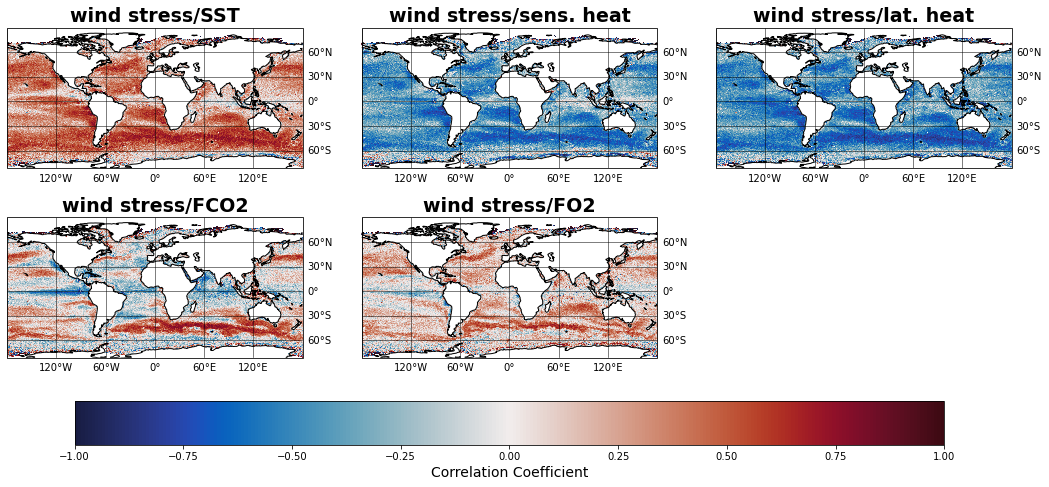

In [31]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,8),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
p1=wind_SST_corr.plot(ax=axs[0],x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, add_colorbar=False, transform=ccrs.PlateCarree())
p2=wind_sh_corr.plot(ax=axs[1],x='geolon_t', y='geolat_t',vmin=-1, vmax=1, cmap=cmo.balance,  add_colorbar=False, transform=ccrs.PlateCarree())
p1=wind_lh_corr.plot(ax=axs[2],x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, add_colorbar=False, transform=ccrs.PlateCarree())
p2=wind_co2_corr.plot(ax=axs[3],x='geolon_t', y='geolat_t',vmin=-1, vmax=1, cmap=cmo.balance,  add_colorbar=False, transform=ccrs.PlateCarree())
p1=wind_o2_corr.plot(ax=axs[4],x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, add_colorbar=False, transform=ccrs.PlateCarree())

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()
    
axs[0].set_title('wind stress/SST', fontweight='bold', fontsize=19);
axs[1].set_title('wind stress/sens. heat', fontweight='bold', fontsize=19)
axs[2].set_title('wind stress/lat. heat', fontweight='bold', fontsize=19);
axs[3].set_title('wind stress/FCO2', fontweight='bold', fontsize=19)
axs[4].set_title('wind stress/FO2', fontweight='bold', fontsize=19);
axs[5].set_axis_off()
cbar = fig.colorbar(p1, ax=axs, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.set_label('Correlation Coefficient', fontsize=14)
;

plt.savefig(pathp+'wind_corr_maps_median.png', dpi=300, bbox_inches='tight');
